In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import smartlab as sl
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

%matplotlib inline

In [48]:
alpha = 41 * 1e-3
T0 = 299
l_cu = 20
S_cu = np.pi * (0.025 * 1e-3) ** 2
l_sc = 39 * 1e-3
S_sc = 16 * 1e-6

data = pd.read_csv('11.1.tsv', delimiter='\t')
data['$T,\ K$'] = np.round(data.iloc[:, 0] / alpha + T0, 1)
data['$1/T,\ mK^{-1}$'] = np.round(1000 / data['$T,\ K$'], 3)
data['$\sigma_{Cu},\ 10^7\cdot 1/(\Omega\cdot m)$'] = np.round(l_cu / S_cu / data.iloc[:, 1] / 1000, 3)
data['$\sigma_{SC},\ 1/(\Omega\cdot m)$'] = np.round(l_sc / S_sc / data.iloc[:, 2] / 1000, 2)
data['$\ln \sigma_{SC}$'] = np.round(np.log(data.iloc[:, 6]), 2)
data

,"$U,\ mV$","$R_{Cu},\ k\Omega$","$R_{SC},\ k\Omega$","$T,\ K$","$1/T,\ mK^{-1}$","$\sigma_{Cu},\ 10^7\cdot 1/(\Omega\cdot m)$","$\sigma_{SC},\ 1/(\Omega\cdot m)$",$\ln \sigma_{SC}$
0,0.11,0.181,0.289,301.7,3.315,5.627578e+07,8.43,2.13
1,0.45,0.185,0.264,310.0,3.226,5.505901e+07,9.23,2.22
2,0.74,0.189,0.228,317.0,3.155,5.389374e+07,10.69,2.37
3,1.05,0.194,0.186,324.6,3.081,5.250472e+07,13.10,2.57
4,1.37,0.199,0.145,332.4,3.008,5.118551e+07,16.81,2.82
5,1.71,0.205,0.110,340.7,2.935,4.968740e+07,22.16,3.10
6,2.02,0.210,0.084,348.3,2.871,4.850436e+07,29.02,3.37
7,2.34,0.215,0.066,356.1,2.808,4.737636e+07,36.93,3.61
8,2.61,0.220,0.053,362.7,2.757,4.629962e+07,45.99,3.83
9,2.89,0.224,0.044,369.5,2.706,4.547284e+07,55.40,4.01


In [40]:
sl.table(data, piece=11)

\begin{tabular}{rrrrrrrr}\\
$U,\ mV$ & $R_{Cu},\ k\Omega$ & $R_{SC},\ k\Omega$ & $T,\ K$ & $1/T,\ mK^{-1}$ & $\sigma_{Cu},\ 10^7\cdot 1/(\Omega\cdot m)$ & $\sigma_{SC},\ 1/(\Omega\cdot m)$ & $\ln \sigma_{SC}$\\ \hline
$0.11$ & $0.18100000000000002$ & $0.289$ & $301.7$ & $3.315$ & $5.628$ & $8.43$ & $2.13$ \\
$0.45$ & $0.185$ & $0.264$ & $310.0$ & $3.226$ & $5.506$ & $9.23$ & $2.22$ \\
$0.74$ & $0.18899999999999997$ & $0.228$ & $317.0$ & $3.155$ & $5.389$ & $10.69$ & $2.37$ \\
$1.05$ & $0.19399999999999998$ & $0.18600000000000003$ & $324.6$ & $3.081$ & $5.25$ & $13.1$ & $2.57$ \\
$1.37$ & $0.19899999999999998$ & $0.145$ & $332.4$ & $3.008$ & $5.119$ & $16.81$ & $2.82$ \\
$1.71$ & $0.205$ & $0.11$ & $340.7$ & $2.935$ & $4.969$ & $22.16$ & $3.1$ \\
$2.02$ & $0.21$ & $0.084$ & $348.3$ & $2.871$ & $4.85$ & $29.02$ & $3.37$ \\
$2.34$ & $0.215$ & $0.066$ & $356.1$ & $2.808$ & $4.738$ & $36.93$ & $3.61$ \\
$2.61$ & $0.22$ & $0.053$ & $362.7$ & $2.757$ & $4.63$ & $45.99$ & $3.83$ \\
$2.89$ & $0

In [41]:
def lin(x, a, b):
    return a * x + b

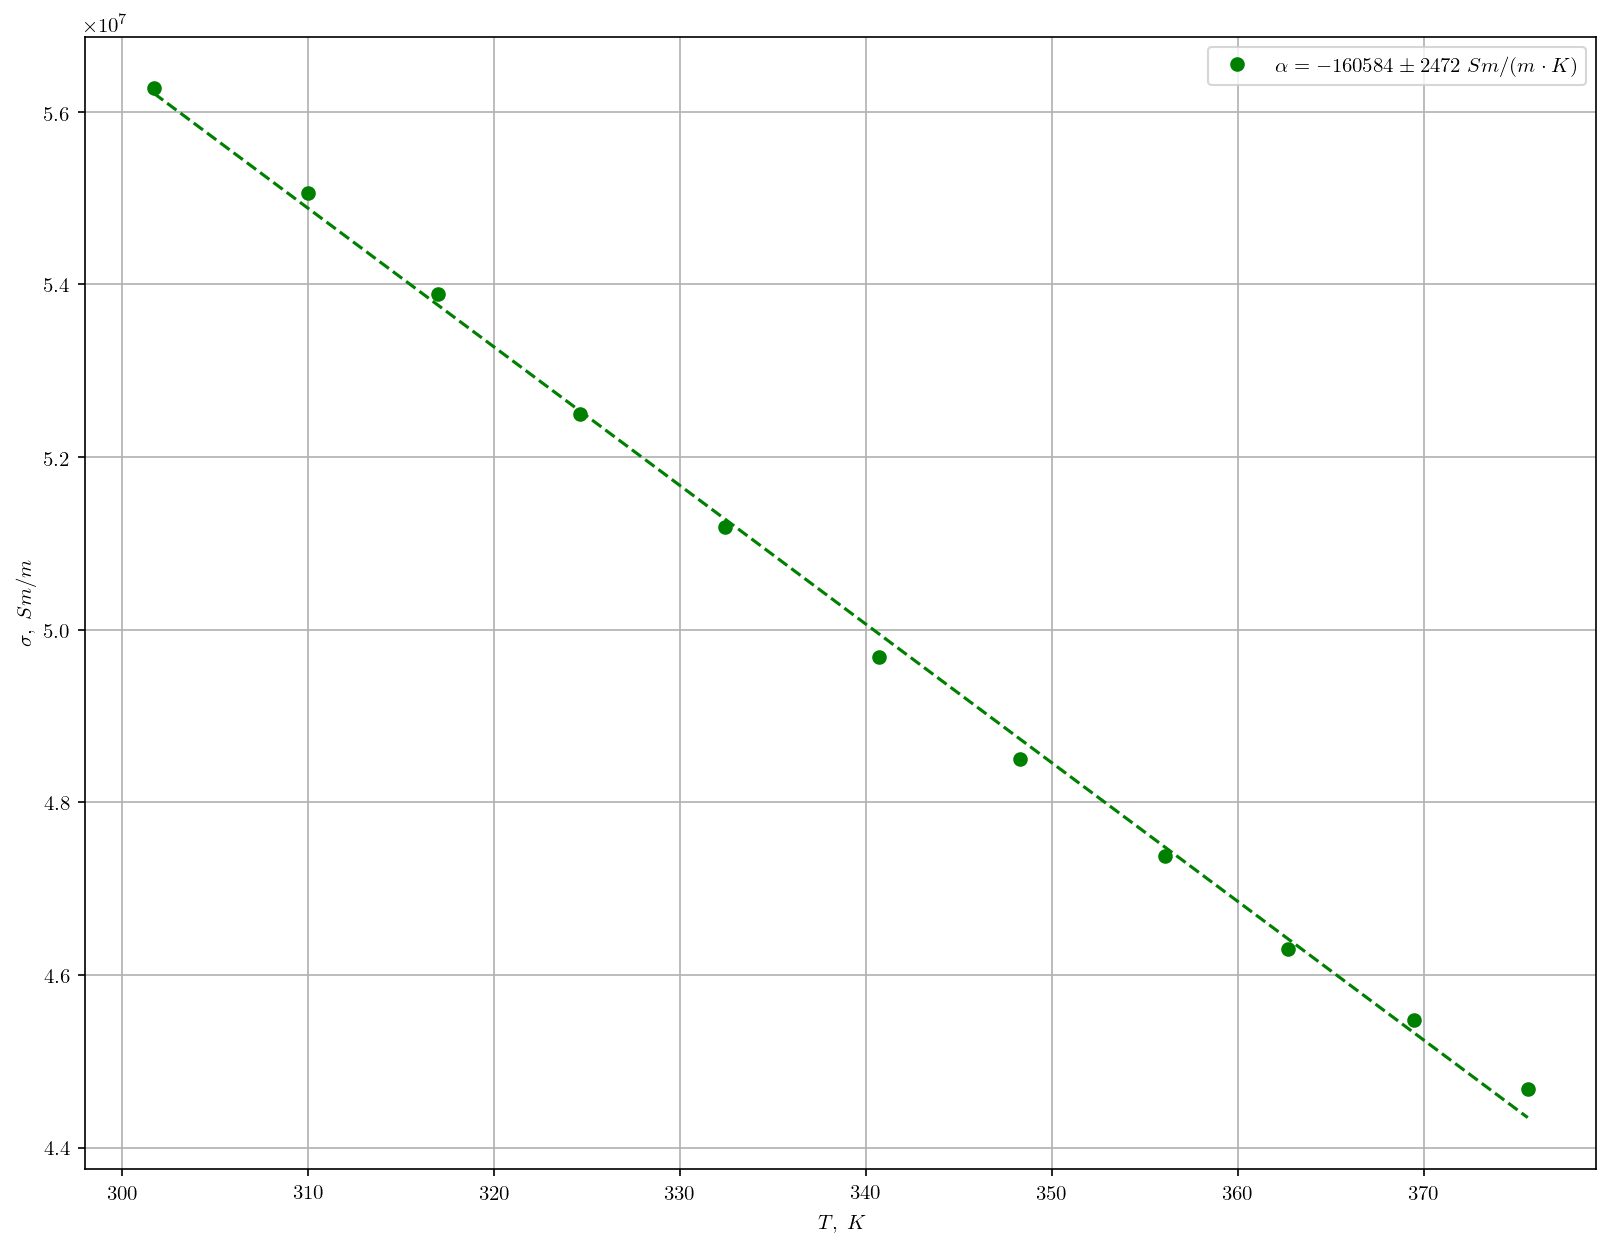

In [50]:
popt, pcov = curve_fit(lin, data.iloc[:, 3], data.iloc[:, 5])
x = np.linspace(data.iloc[0, 3], data.iloc[-1, 3], 100)

plt.figure(figsize=(13, 10), dpi=150)
plt.plot(data.iloc[:, 3], data.iloc[:, 5], 'go')
plt.plot(x, lin(x, popt[0], popt[1]), '--g')
plt.grid()
plt.xlabel('$T,\ K$')
plt.ylabel('$\sigma,\ Sm/m$')
plt.legend(['$\\alpha={0:.0f}\\pm{1:.0f}\\ Sm / (m\\cdot K)$'.format(popt[0], pcov[0][0] ** 0.5)])
plt.savefig('sigmaCu.png')

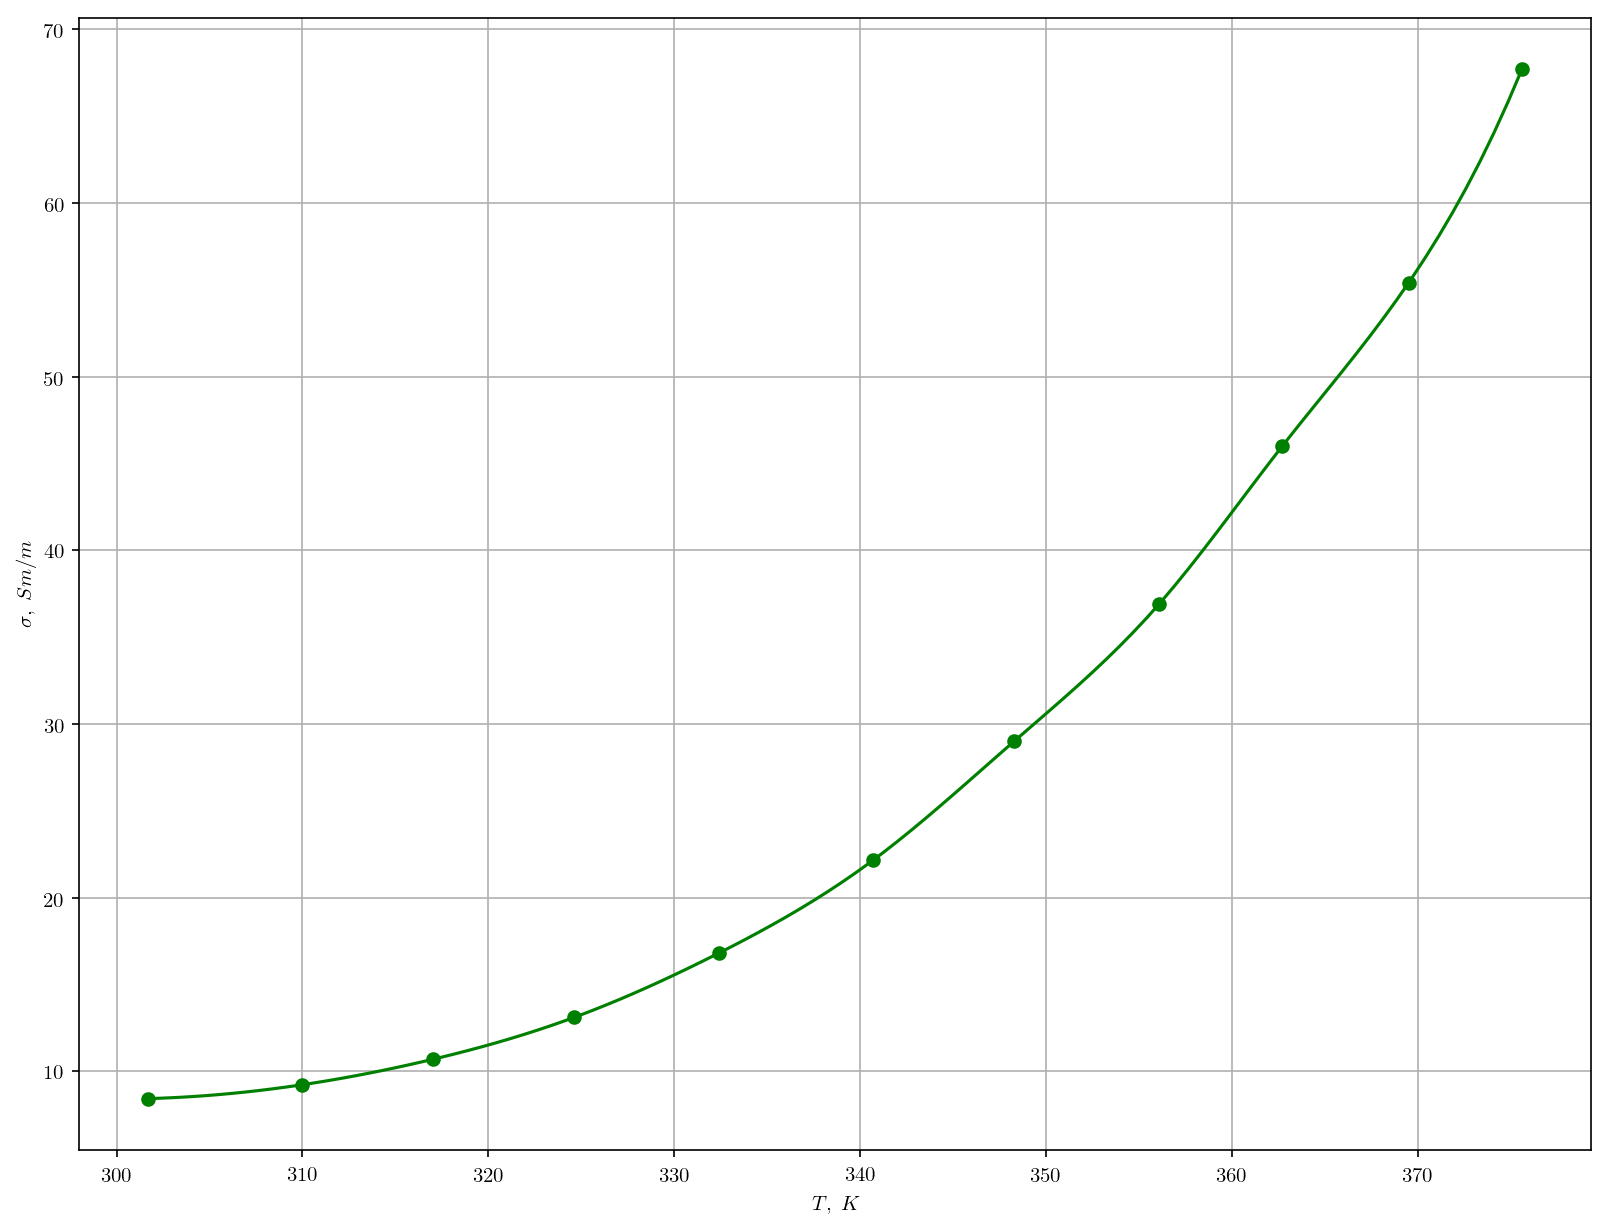

In [51]:
f = interp1d(data.iloc[:, 3], data.iloc[:, 6], kind='cubic')
x = np.linspace(data.iloc[0, 3], data.iloc[-1, 3], 100)

plt.figure(figsize=(13, 10), dpi=150)
plt.plot(data.iloc[:, 3], data.iloc[:, 6], 'go')
plt.plot(x, f(x), '-g')
plt.grid()
plt.xlabel('$T,\ K$')
plt.ylabel('$\sigma,\ Sm/m$')
plt.savefig('sigmaSC.png')

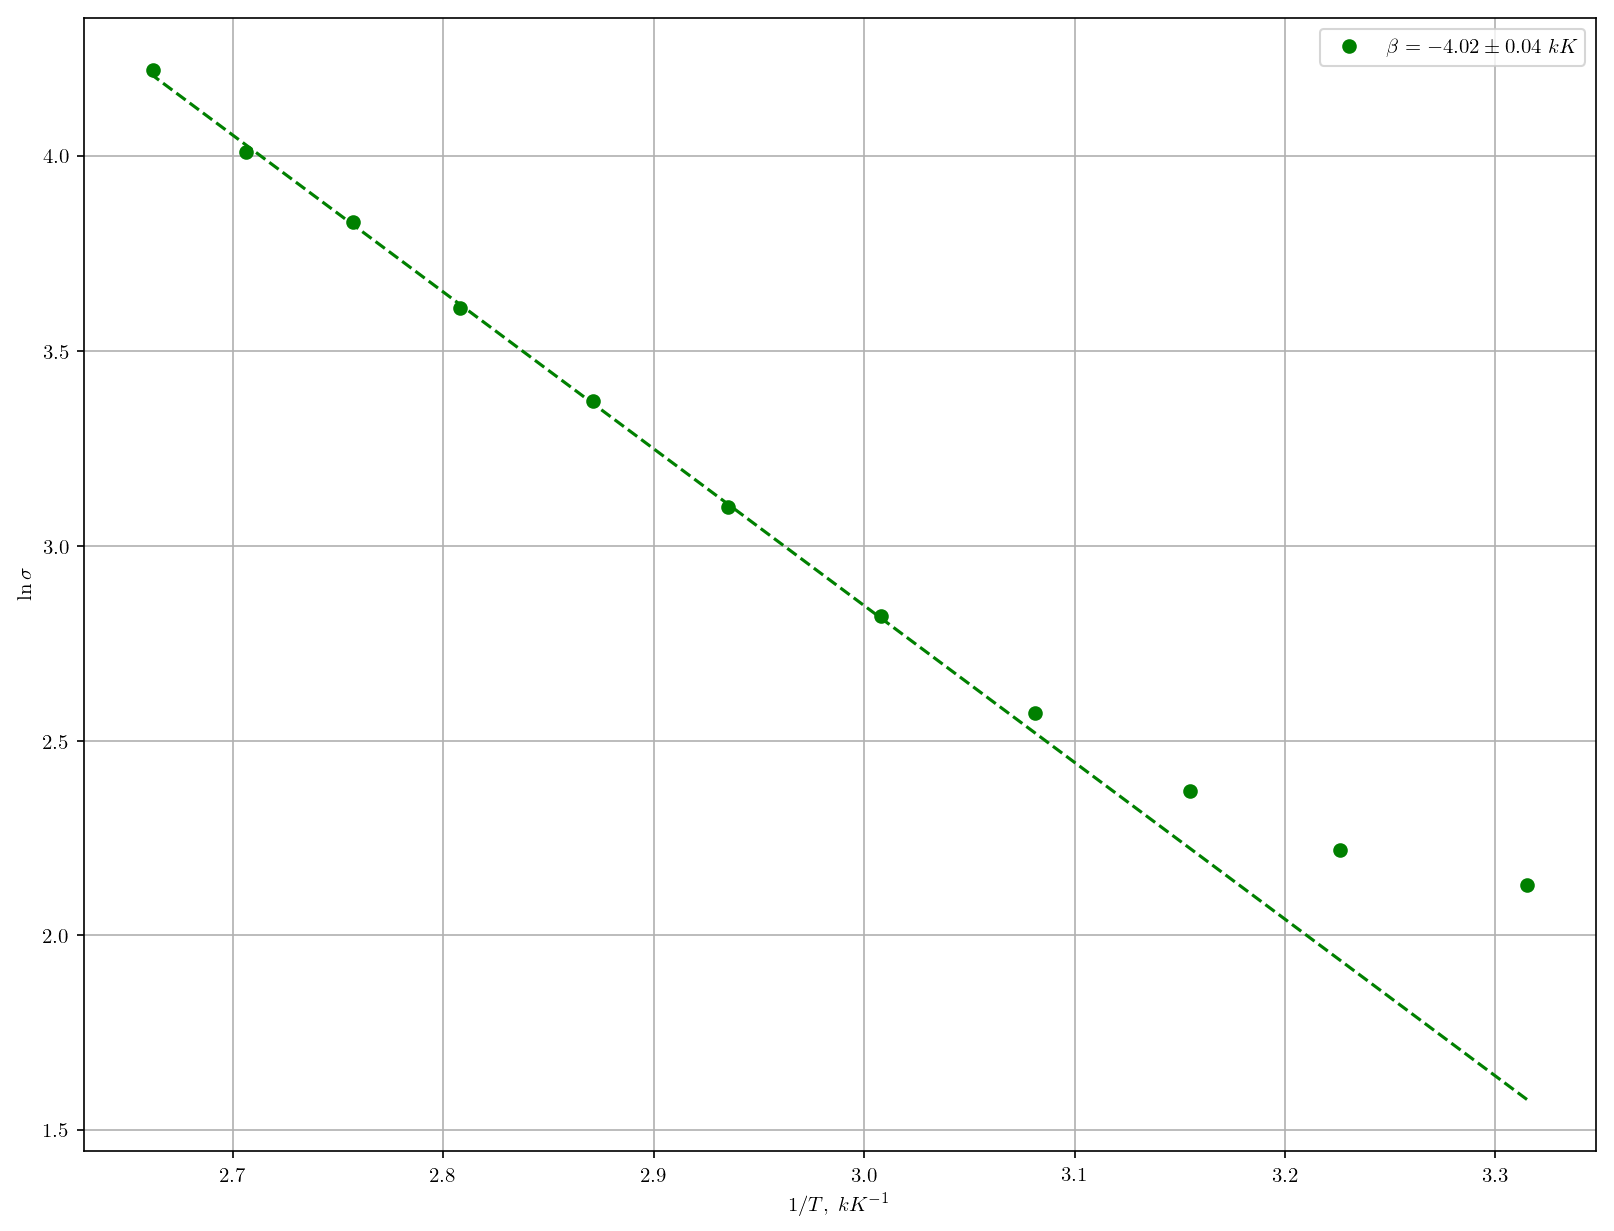

In [52]:
popt, pcov = curve_fit(lin, data.iloc[4:, 4], data.iloc[4:, 7])
x = np.linspace(data.iloc[0, 4], data.iloc[-1, 4], 100)

plt.figure(figsize=(13, 10), dpi=150)
plt.plot(data.iloc[:, 4], data.iloc[:, 7], 'go')
plt.plot(x, lin(x, popt[0], popt[1]), '--g')
plt.grid()
plt.xlabel('$1/T,\ kK^{-1}$')
plt.ylabel('$\ln\sigma$')
plt.legend(['$\\beta={0:.2f}\\pm{1:.2f}\\ kK$'.format(popt[0], pcov[0][0] ** 0.5)])
plt.savefig('lnsigma.png')

In [45]:
4020 * 1.38 * 2 * 1e-23 / (1.6 * 1e-19)

0.6934499999999999

In [63]:
32.8 / 2 ** 0.5

23.193102422918756

In [64]:
4 * 2.91 * 1e-3 / (42 * np.pi ** 2 * 2 * 50 * (14.9 * 1e-3) ** 2) / (2 ** 0.5)

0.0008943683251128225

In [60]:
6.62 * 1e-34 * 180.84 * 1e6 / (6.4e-3 * 927e-26)

2.017868122977346

In [65]:
16 / 88 * 8.9

1.6181818181818184